In [1]:
import numpy as np                   # Data manipulation
import pandas as pd                  # DataFrame manipulation
import time                          # To time processes 
import warnings                      # To suppress warnings
import matplotlib.pyplot as plt      # For Graphics
import seaborn as sns
from sklearn import cluster, mixture # For clustering 
from sklearn.preprocessing import StandardScaler

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
file = "happiness.csv"
file_pd = pd.read_csv(file)
file_pd.head()

,Unnamed: 0,Country Name,Happiness Rank 2015,Happiness Score 2015,Happiness Rank 2016,Happiness Score 2016,GDP(billions) 2015,"GDP, 2016 (billions)",Total Population 2015,Total Population 2016,GDP/Pop 2015,GDP/Pop 2016,GDI 2015,GDI 2016,GDI/Pop 2015,GDI/Pop 2016,CPI 2015,CPI 2016
0,0,Switzerland,1,7.587,2,7.509,679.00,669.0,8282.40,8372.41,81.981068,79.905308,6.673750e+11,6.656087e+11,8.057749e+07,7.950025e+07,100.617575,100.180283
1,1,Iceland,2,7.561,3,7.501,16.94,20.3,330.82,335.44,51.206094,60.517529,1.891027e+12,2.063429e+12,5.716182e+09,6.151410e+09,239.815158,243.876225
2,2,Denmark,3,7.527,1,7.526,301.00,307.0,5683.48,5728.01,52.960510,53.596275,1.928783e+12,1.958050e+12,3.393665e+08,3.418377e+08,100.000000,100.250000
3,3,Norway,4,7.522,4,7.498,387.00,371.0,5190.24,5236.15,74.563026,70.853585,2.739875e+12,2.682282e+12,5.278899e+08,5.122622e+08,100.000000,103.550000
4,4,Canada,5,7.427,6,7.404,1560.00,1540.0,35832.51,36264.60,43.535884,42.465655,1.819117e+12,1.834327e+12,5.076722e+07,5.058176e+07,126.566667,128.375000


In [3]:
file_pd=file_pd.fillna(value=0)

In [4]:
X = file_pd.iloc[:, 2: ]      # Ignore Country and Happiness_Rank columns
X.dtypes

Happiness Rank 2015        int64
Happiness Score 2015     float64
Happiness Rank 2016        int64
Happiness Score 2016     float64
GDP(billions) 2015       float64
GDP, 2016 (billions)     float64
Total Population 2015    float64
Total Population 2016    float64
GDP/Pop 2015             float64
GDP/Pop 2016             float64
GDI 2015                 float64
GDI 2016                 float64
GDI/Pop 2015             float64
GDI/Pop 2016             float64
CPI 2015                 float64
CPI 2016                 float64
dtype: object

In [5]:
ss = StandardScaler()
ss.fit_transform(X)

array([[-1.47697739,  1.6736231 , -1.45095238, ..., -0.2447018 ,
        -0.18581502, -0.19127938],
       [-1.45443405,  1.6503036 , -1.42842689, ...,  1.20069743,
        -0.01469866, -0.01834491],
       [-1.43189071,  1.61980886, -1.47347788, ..., -0.18225317,
        -0.18657421, -0.19119548],
       ...,
       [ 1.79180678, -1.73999401,  1.86029495, ..., -0.05498686,
        -0.12176631, -0.18794905],
       [ 1.97215349, -2.02341571,  1.92787142, ..., -0.13540305,
        -0.18272986, -0.18062933],
       [ 1.99469683, -2.13552873,  1.95039691, ..., -0.16966809,
        -0.17099891, -0.17739864]])

In [6]:
class ClustringAlgorithms(object) :
    n_clusters = 2      # No of clusters. To use with techniques which needs this as input
    bandwidth = 0.1     # To use with Mean Shift technique
    eps = 0.3           # To use with DbScan technique for incremental area density
    damping = 0.9       # To use with Affinity Propogation technique
    preference = -200   # To use with Affinity Propogation technique 
      
    # KMeans algorithm clusters data by trying to separate samples in n groups
    # of equal variance, minimizing a criterion known as the within-cluster sum-of-squares.
    # Parameter: Dataset, No of clusters.
    def kmeans(self, X, n_clusters = n_clusters):
        km = cluster.KMeans(n_clusters)
        return km.fit_predict(X)
    
    # This clustering aims to discover blobs in a smooth density of samples.
    # It is a centroid based algorithm, which works by updating candidates
    # for centroids to be the mean of the points within a given region.
    # These candidates are then filtered in a post-processing stage to
    # eliminate near-duplicates to form the final set of centroids.
    # Parameter: Dataset, bandwidth dictates size of the region to search through.
    def meanshift(self, X, bandwidth=bandwidth):
        ms = cluster.MeanShift(bandwidth)
        return  ms.fit_predict(X)
    
    # Similar to kmeans but clustering is done in batches to reduce computation time
    # Parameter: Dataset,No of clusters.
    def minibatchkmeans(self, X, n_clusters = n_clusters):
        two_means = cluster.MiniBatchKMeans(n_clusters)
        return two_means.fit_predict(X)
   
    def spectral(self, X, n_clusters = n_clusters):
        sp = cluster.SpectralClustering(n_clusters)
        return sp.fit_predict(X)

    def dbscan(self, X, eps=eps):
        db = cluster.DBSCAN(eps)
        return db.fit_predict(X)
    
    def affinitypropagation(self, X, preference=preference, damping=damping):
        affinity_propagation =  cluster.AffinityPropagation(damping, preference)
        affinity_propagation.fit(X)
        return affinity_propagation.predict(X)
       
    def birch(self, X, n_clusters = n_clusters):
        birch = cluster.Birch(n_clusters)
        return birch.fit_predict(X)
   
    def gaussian_mixture(self, X, n_clusters = n_clusters):
        gmm = mixture.GaussianMixture(n_clusters, covariance_type='full')
        gmm.fit(X)
        return  gmm.predict(X)
def clusteringAlgoProcessing(dataSet):
    fig,ax = plt.subplots(4, 2, figsize=(10,10)) 
    clusterAlgo = ClustringAlgorithms()
    i = 0
    j=0
    listofClusterMethod = ['KMeans',"MeanShift","MiniBatchKmeans","DBScan","Spectral","Birch","Gaussian_Mixture"]
    for cm in listofClusterMethod :
        methodName = str(cm).lower()
        method = getattr(clusterAlgo, methodName)
        result = method(dataSet)
        dataSet[cm] = pd.DataFrame(result)
        ax[i,j].scatter(dataSet.iloc[:, 4], dataSet.iloc[:, 5],  c=result)
        ax[i,j].set_title(cm)
        j=j+1
        if( j % 2 == 0) :
            j= 0
            i=i+1
    plt.subplots_adjust(bottom=-0.5, top=1.5)
    plt.show()

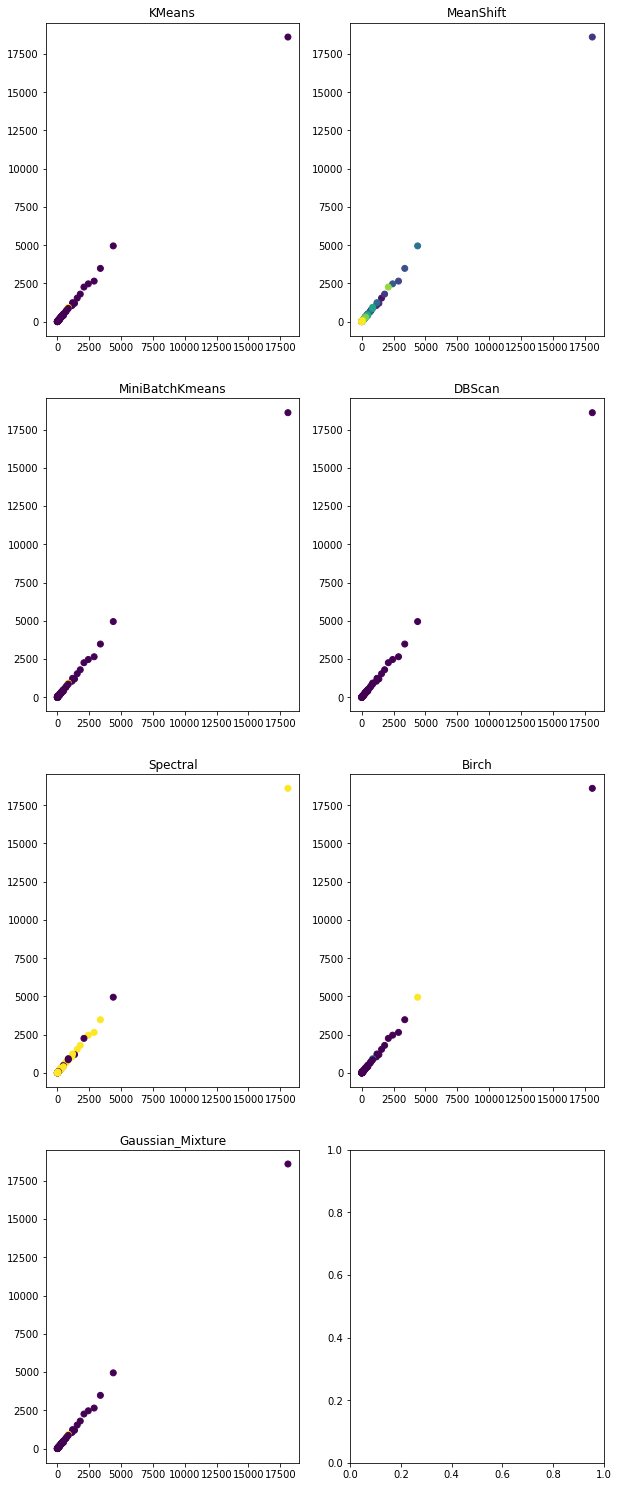

In [7]:
clusteringAlgoProcessing(X)

In [10]:
X.insert(0,'Country2', file_pd.iloc[:,0])
file_pd.head()

,Unnamed: 0,Country Name,Happiness Rank 2015,Happiness Score 2015,Happiness Rank 2016,Happiness Score 2016,GDP(billions) 2015,"GDP, 2016 (billions)",Total Population 2015,Total Population 2016,GDP/Pop 2015,GDP/Pop 2016,GDI 2015,GDI 2016,GDI/Pop 2015,GDI/Pop 2016,CPI 2015,CPI 2016
0,0,Switzerland,1,7.587,2,7.509,679.00,669.0,8282.40,8372.41,81.981068,79.905308,6.673750e+11,6.656087e+11,8.057749e+07,7.950025e+07,100.617575,100.180283
1,1,Iceland,2,7.561,3,7.501,16.94,20.3,330.82,335.44,51.206094,60.517529,1.891027e+12,2.063429e+12,5.716182e+09,6.151410e+09,239.815158,243.876225
2,2,Denmark,3,7.527,1,7.526,301.00,307.0,5683.48,5728.01,52.960510,53.596275,1.928783e+12,1.958050e+12,3.393665e+08,3.418377e+08,100.000000,100.250000
3,3,Norway,4,7.522,4,7.498,387.00,371.0,5190.24,5236.15,74.563026,70.853585,2.739875e+12,2.682282e+12,5.278899e+08,5.122622e+08,100.000000,103.550000
4,4,Canada,5,7.427,6,7.404,1560.00,1540.0,35832.51,36264.60,43.535884,42.465655,1.819117e+12,1.834327e+12,5.076722e+07,5.058176e+07,126.566667,128.375000


In [11]:
X.iloc[:,[0,18,19,20,21,22,23,24]]

,Country2,KMeans,MeanShift,MiniBatchKmeans,DBScan,Spectral,Birch,Gaussian_Mixture
0,0,0,0,0,-1,1,0,0
1,1,0,1,0,-1,1,0,0
2,2,0,2,0,-1,1,0,0
3,3,0,3,0,-1,0,0,0
4,4,0,4,0,-1,1,0,0
5,5,0,5,0,-1,1,0,0
6,6,0,6,0,-1,0,0,0
7,7,0,7,0,-1,1,0,0
8,8,0,8,0,-1,0,0,0
9,9,0,9,0,-1,1,0,0


In [20]:
data = dict(type = 'choropleth', 
           locations = X['Country'],
           locationmode = 'country names',
           z = X['KMeans'], 
           text = X['Country'],
           colorbar = {'title':'Cluster Group'})
layout = dict(title = 'Clustering Visualization', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)